In [ ]:
import yfinance as yf

In [ ]:
from datetime import datetime
end = datetime.now()
start = datetime(end.year-20,end.month,end.day)

In [ ]:
stock = 'GOOG'
data = yf.download(stock,start,end)

[*********************100%***********************]  1 of 1 completed


In [ ]:
data.tail(5)

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
Date,,,,,,
2024-10-29 00:00:00+00:00,171.139999,171.139999,171.860001,168.660004,169.384995,28916100
2024-10-30 00:00:00+00:00,176.139999,176.139999,183.789993,175.744995,182.410004,49698300
2024-10-31 00:00:00+00:00,172.690002,172.690002,178.419998,172.559998,174.720001,32801900
2024-11-01 00:00:00+00:00,172.649994,172.649994,173.820007,170.309998,171.539993,21752900
2024-11-04 00:00:00+00:00,170.679993,170.679993,171.919998,169.485001,171.240005,16172300


In [ ]:
data.shape

(5033, 6)

In [ ]:
data.describe()

Price,Adj Close,Close,High,Low,Open,Volume
Ticker,GOOG,GOOG,GOOG,GOOG,GOOG,GOOG
count,5033.000000,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,47.232294,47.342557,47.821751,46.851248,47.324787,1.118498e+08
std,45.129748,45.225151,45.696721,44.756690,45.202831,1.449350e+08
min,4.102013,4.112087,4.221676,4.017691,4.096396,1.584340e+05
25%,13.185575,13.217956,13.372377,13.089936,13.250334,2.674390e+07
50%,27.624363,27.692204,27.868486,27.457115,27.746250,5.221800e+07
75%,62.029667,62.181999,62.737000,61.682049,62.150002,1.362287e+08
max,192.406723,192.660004,193.309998,190.619995,191.750000,1.650833e+09


In [ ]:
data.isna().sum()

,,0
Price,Ticker,
Adj Close,GOOG,0
Close,GOOG,0
High,GOOG,0
Low,GOOG,0
Open,GOOG,0
Volume,GOOG,0


In [ ]:
data.columns

MultiIndex([('Adj Close', 'GOOG'),
            (    'Close', 'GOOG'),
            (     'High', 'GOOG'),
            (      'Low', 'GOOG'),
            (     'Open', 'GOOG'),
            (   'Volume', 'GOOG')],
           names=['Price', 'Ticker'])

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

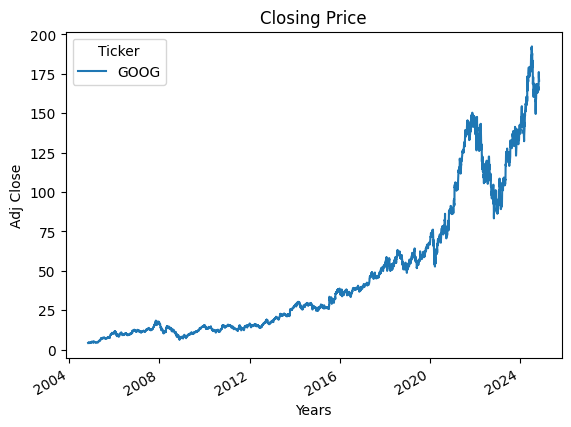

In [ ]:
data['Adj Close'].plot()
plt.xlabel("Years")
plt.ylabel("Adj Close")
plt.title("Closing Price")
plt.show()


In [ ]:
def plot_graph(figSize,values,column_name):
  plt.figure()
  values.plot(figsize =figSize)
  plt.xlabel("Years")
  plt.ylabel(column_name)
  plt.title(f"{column_name} of {stock}")
  plt.show()


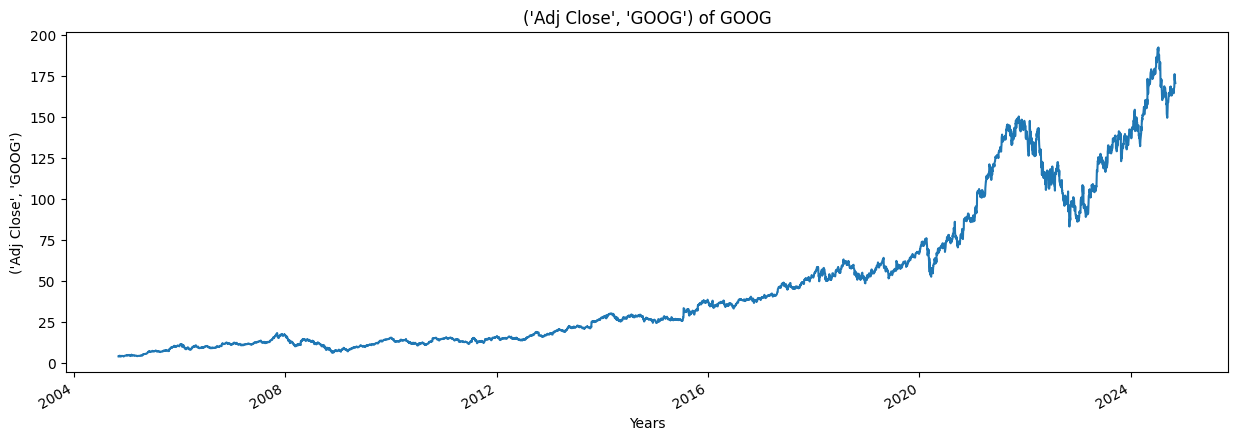

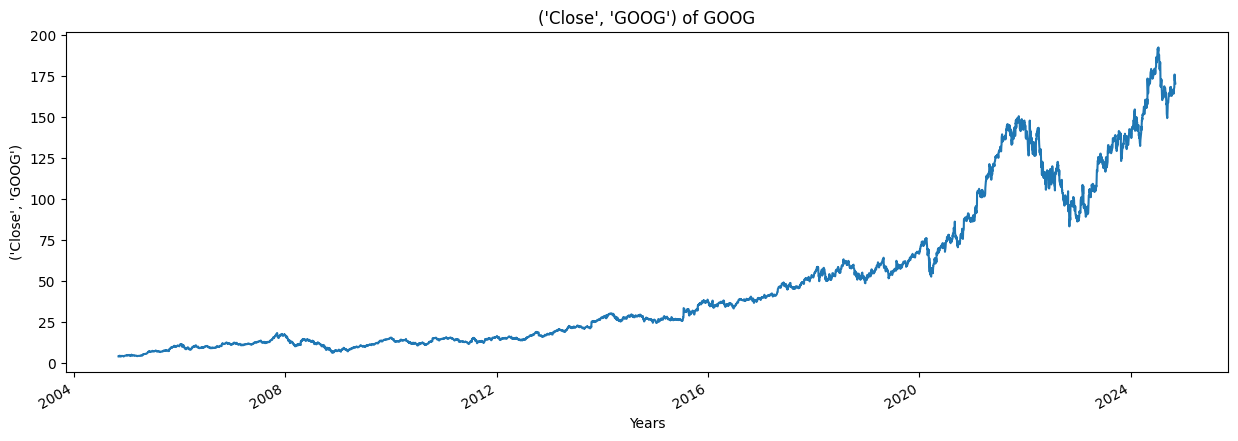

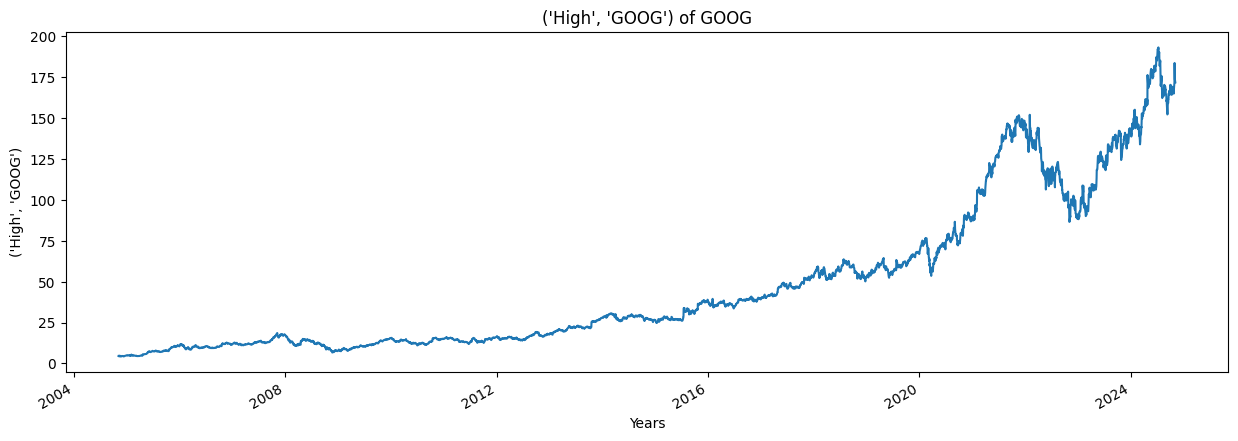

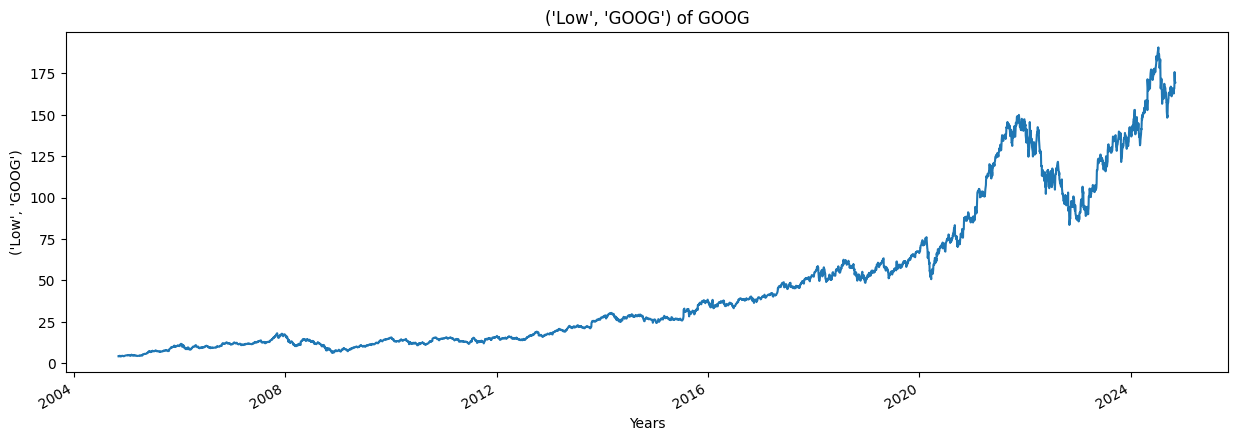

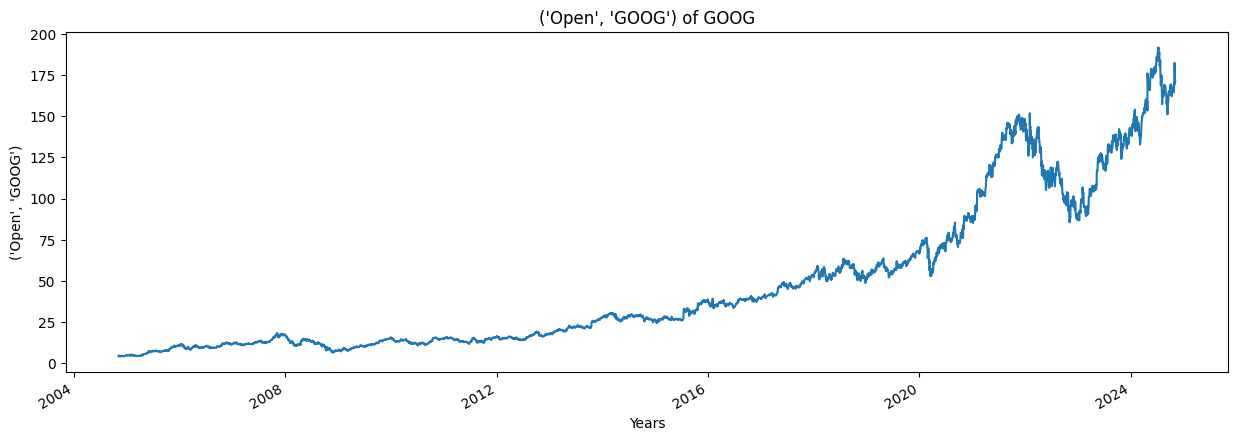

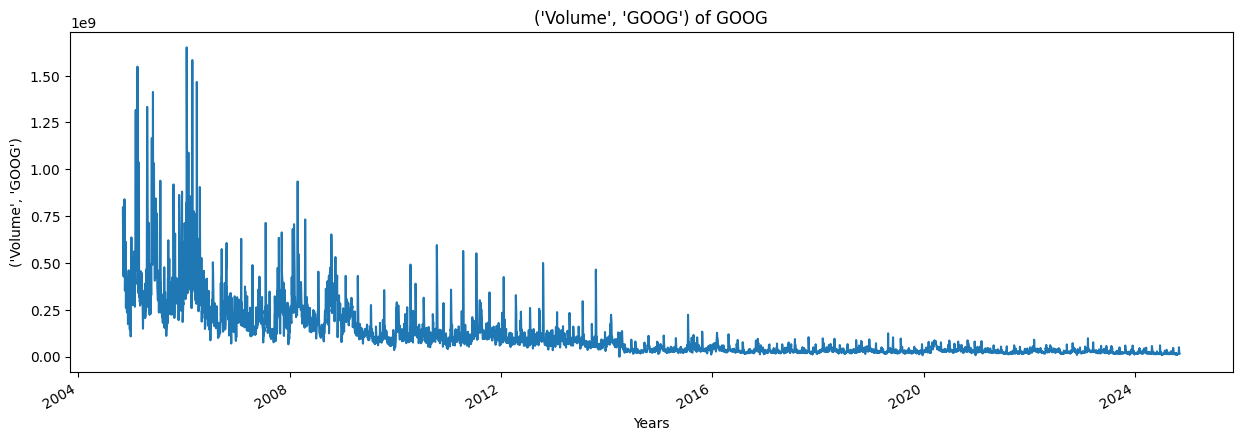

In [ ]:
for column in data.columns:
  plot_graph((15,5),data[column],column)

In [ ]:
import pandas as pd
df = pd.DataFrame([10, 20, 30, 40, 50, 60, 70, 80, 90, 100])
df.head()

,0
0,10
1,20
2,30
3,40
4,50


In [ ]:
df['MA'] = df.rolling(5).mean()
df

,0,MA
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,100,80.0


In [ ]:
for i in range(2004,2025):
    print(i,list(data.index.year).count(i))

2004 39
2005 252
2006 251
2007 251
2008 253
2009 252
2010 252
2011 252
2012 250
2013 252
2014 252
2015 252
2016 252
2017 251
2018 251
2019 252
2020 253
2021 252
2022 251
2023 250
2024 213


In [ ]:
data['MA_for_250_days'] = data['Adj Close'].rolling(250).mean()

In [ ]:
data['MA_for_250_days'][0:250].tail()

,MA_for_250_days
Date,
2005-10-26 00:00:00+00:00,NaN
2005-10-27 00:00:00+00:00,NaN
2005-10-28 00:00:00+00:00,NaN
2005-10-31 00:00:00+00:00,NaN
2005-11-01 00:00:00+00:00,5.978247


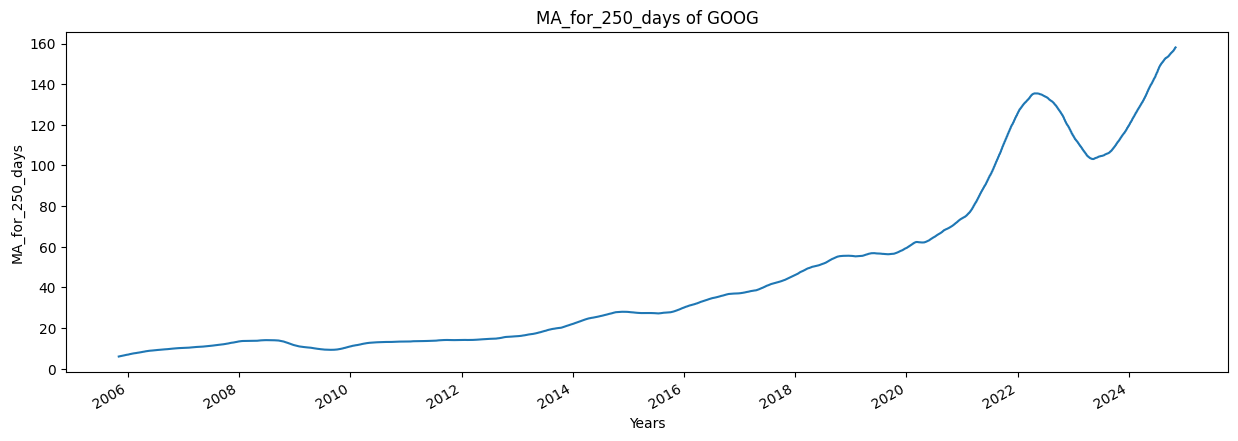

In [ ]:
plot_graph((15,5), data['MA_for_250_days'], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

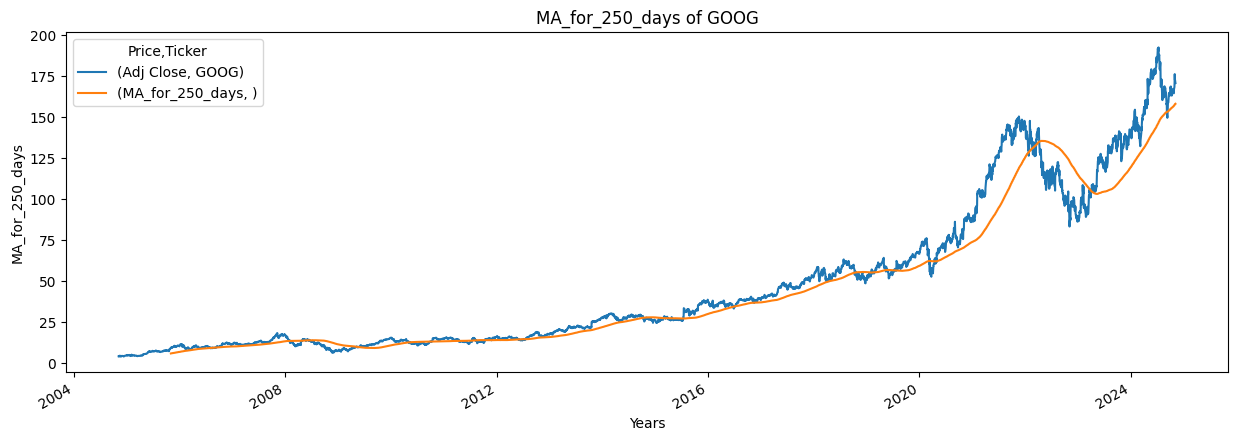

In [ ]:
plot_graph((15,5), data[['Adj Close','MA_for_250_days']], 'MA_for_250_days')

<Figure size 640x480 with 0 Axes>

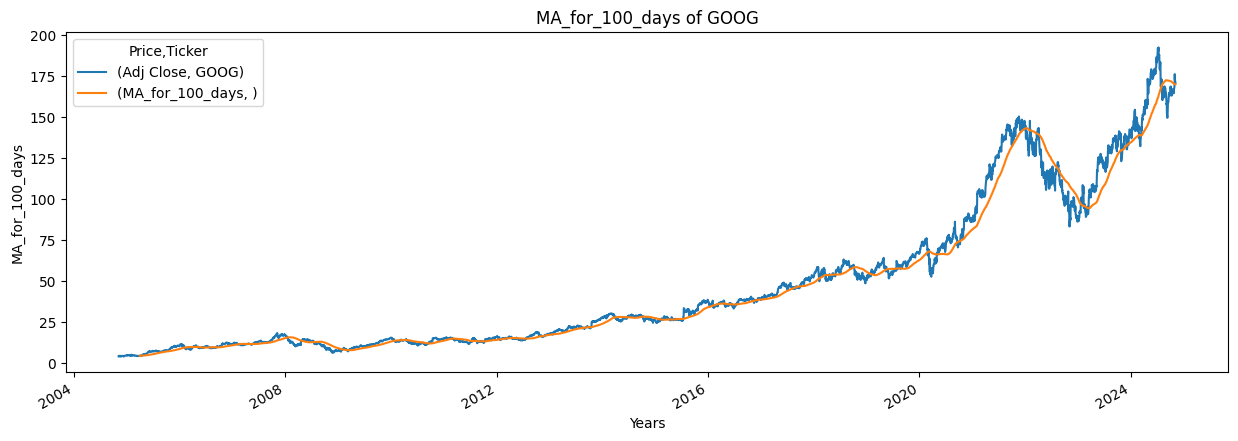

In [ ]:
data['MA_for_100_days'] = data['Adj Close'].rolling(100).mean()
plot_graph((15,5), data[['Adj Close','MA_for_100_days']], 'MA_for_100_days')

<Figure size 640x480 with 0 Axes>

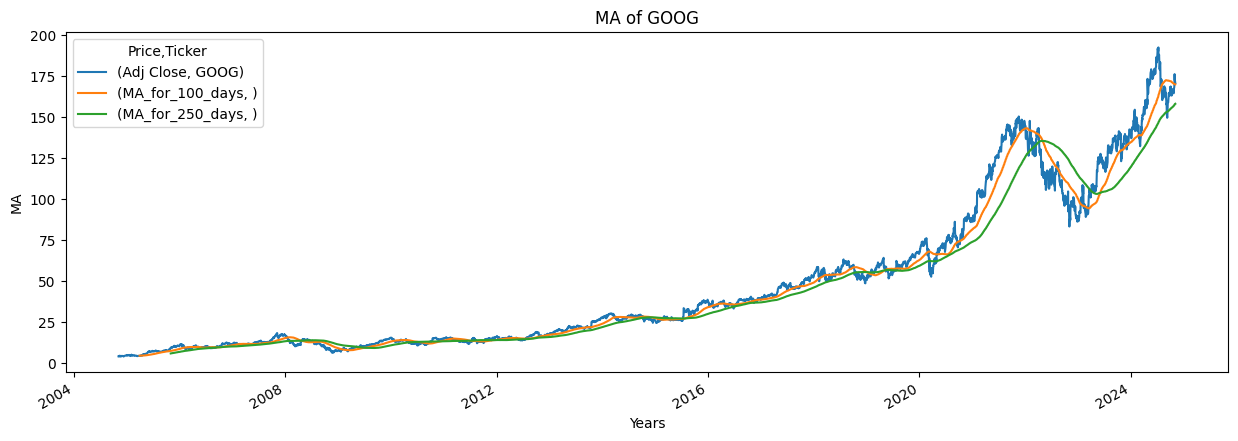

In [ ]:
plot_graph((15,5), data[['Adj Close','MA_for_100_days', 'MA_for_250_days']], 'MA')

In [ ]:
data['percentage_change_cp'] = data['Adj Close'].pct_change()[f'{stock}']
data[['Adj Close','percentage_change_cp']].head()

Price,Adj Close,percentage_change_cp
Ticker,GOOG,
Date,,
2004-11-05 00:00:00+00:00,4.207607,NaN
2004-11-08 00:00:00+00:00,4.287112,0.018896
2004-11-09 00:00:00+00:00,4.191458,-0.022312
2004-11-10 00:00:00+00:00,4.170587,-0.004979
2004-11-11 00:00:00+00:00,4.547246,0.090313


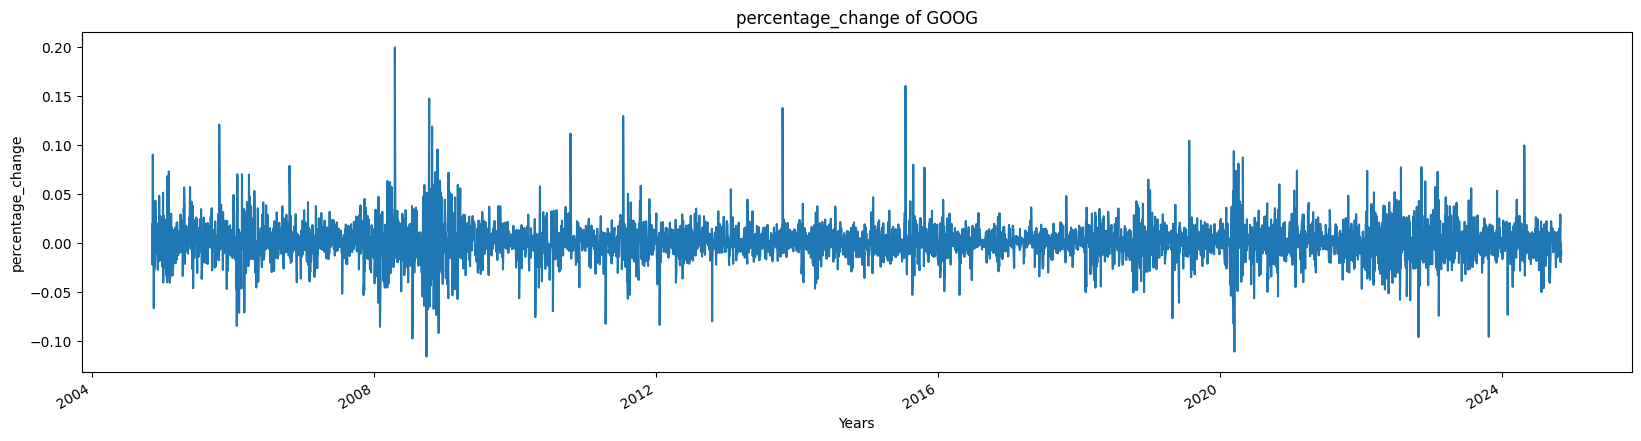

In [ ]:
plot_graph((20,5), data['percentage_change_cp'], 'percentage_change')


In [ ]:
Adj_close_price = data[['Adj Close']]

In [ ]:
max(Adj_close_price.values),min(Adj_close_price.values)

(array([192.40672302]), array([4.10201311]))

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(Adj_close_price)
scaled_data

array([[5.60759640e-04],
       [9.82976607e-04],
       [4.74999469e-04],
       ...,
       [8.95293535e-01],
       [8.95081068e-01],
       [8.84619294e-01]])

In [ ]:
len(scaled_data)

5033

In [ ]:
x_data = []
y_data = []

for i in range(100, len(scaled_data)):
    x_data.append(scaled_data[i-100:i])
    y_data.append(scaled_data[i])

import numpy as np
x_data, y_data = np.array(x_data), np.array(y_data)

In [ ]:
x_data[0],y_data[0]

(array([[0.00056076],
        [0.00098298],
        [0.000475  ],
        [0.00036416],
        [0.00236443],
        [0.00222985],
        [0.00260853],
        [0.00098166],
        [0.00097638],
        [0.00032194],
        [0.00056736],
        [0.        ],
        [0.0003193 ],
        [0.00127458],
        [0.00188548],
        [0.0021045 ],
        [0.00222721],
        [0.00196069],
        [0.0018868 ],
        [0.00201874],
        [0.00147645],
        [0.0008352 ],
        [0.00064388],
        [0.00109909],
        [0.00086423],
        [0.0007059 ],
        [0.00179312],
        [0.00193693],
        [0.0015002 ],
        [0.00197651],
        [0.00262832],
        [0.00246075],
        [0.00279721],
        [0.00300831],
        [0.00353741],
        [0.00364957],
        [0.00366804],
        [0.00428817],
        [0.00365352],
        [0.00496241],
        [0.00387914],
        [0.00374852],
        [0.00309408],
        [0.00379338],
        [0.00395304],
        [0

In [ ]:
int(len(x_data)*0.7)

3453

In [ ]:
4908-100-int(len(x_data)*0.7)

1355

In [ ]:
splitting_len = int(len(x_data)*0.7)
x_train = x_data[:splitting_len]
y_train = y_data[:splitting_len]

x_test = x_data[splitting_len:]
y_test = y_data[splitting_len:]

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3453, 100, 1)
(3453, 1)
(1480, 100, 1)
(1480, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs = 2)

Epoch 1/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 310s 88ms/step - loss: 3.0477e-04
Epoch 2/2
3453/3453 ━━━━━━━━━━━━━━━━━━━━ 339s 93ms/step - loss: 6.8524e-05


In [ ]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_6 (LSTM)                        │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_7 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [ ]:
predictions = model.predict(x_test)
predictions

47/47 ━━━━━━━━━━━━━━━━━━━━ 3s 64ms/step


array([[0.27238572],
       [0.27008662],
       [0.26872337],
       ...,
       [0.9336694 ],
       [0.93606496],
       [0.93305296]], dtype=float32)

In [ ]:
inv_predictions = scaler.inverse_transform(predictions)
inv_predictions

array([[ 55.393528],
       [ 54.960598],
       [ 54.70389 ],
       ...,
       [179.91635 ],
       [180.36745 ],
       [179.80028 ]], dtype=float32)

In [ ]:
inv_y_test = scaler.inverse_transform(y_test)
inv_y_test

array([[ 51.30949402],
       [ 51.02519226],
       [ 50.34685898],
       ...,
       [172.69000244],
       [172.6499939 ],
       [170.67999268]])

In [ ]:
rmse = np.sqrt(np.mean( (inv_predictions - inv_y_test)**2))
rmse

6.783782504920198

In [ ]:
ploting_data = pd.DataFrame(
 {
  'original_test_data': inv_y_test.reshape(-1),
    'predictions': inv_predictions.reshape(-1)
 } ,
    index = data.index[splitting_len+100:]
)
ploting_data.head()

,original_test_data,predictions
Date,,
2018-12-18 00:00:00+00:00,51.309494,55.393528
2018-12-19 00:00:00+00:00,51.025192,54.960598
2018-12-20 00:00:00+00:00,50.346859,54.703892
2018-12-21 00:00:00+00:00,48.857018,54.317795
2018-12-24 00:00:00+00:00,48.691425,53.409996


<Figure size 640x480 with 0 Axes>

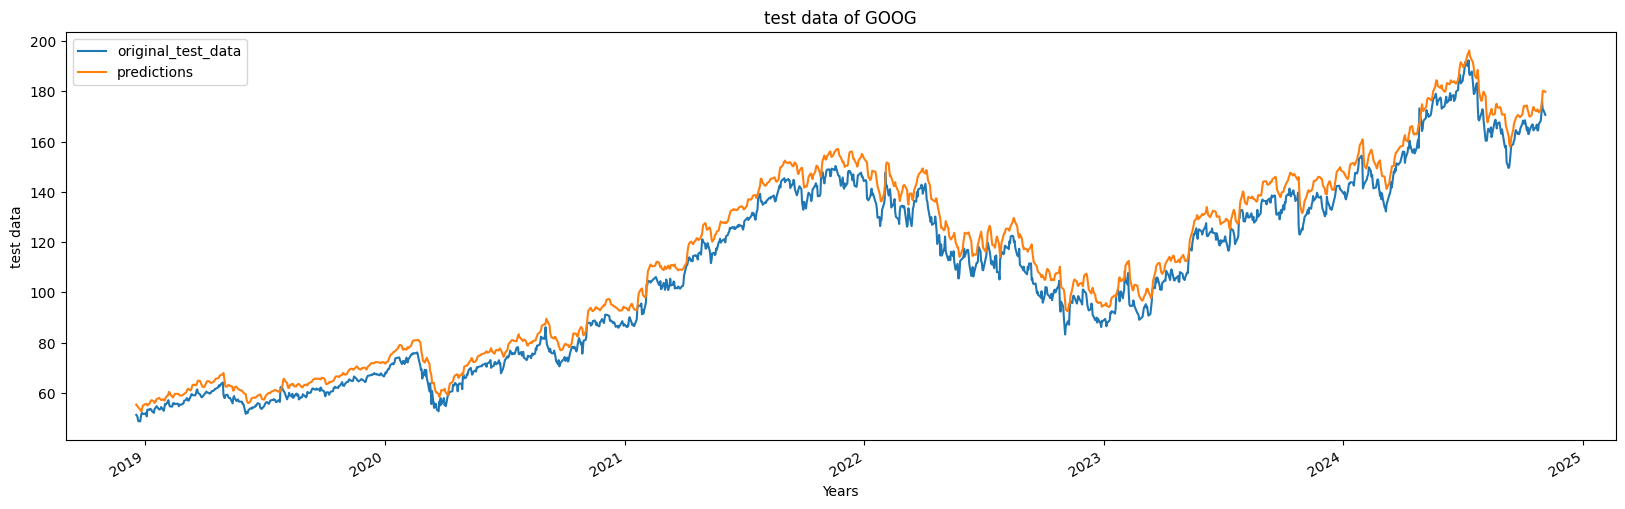

In [ ]:
plot_graph((20,6), ploting_data, 'test data')

<Figure size 640x480 with 0 Axes>

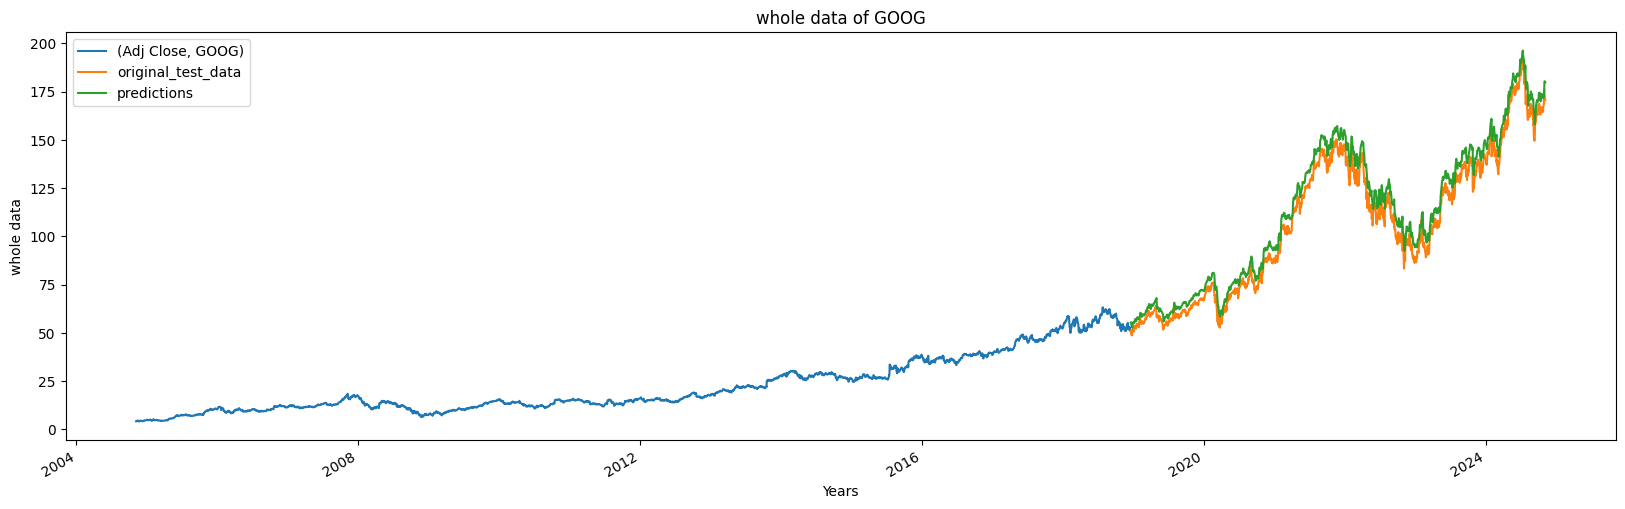

In [ ]:
plot_graph((20,6), pd.concat([Adj_close_price[:splitting_len+100],ploting_data], axis=0), 'whole data')

In [ ]:
model.save("Latest_stock_price_model.keras")